<a href="https://colab.research.google.com/github/ParamasivamJ/Drug_Demand_Forecasting/blob/main/Drugs_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime as dt
import math
import os
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import ParameterGrid

In [54]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/PHARMA_SALES'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/PHARMA_SALES/saleshourly.csv
/content/drive/MyDrive/PHARMA_SALES/salesmonthly.csv
/content/drive/MyDrive/PHARMA_SALES/salesdaily.csv
/content/drive/MyDrive/PHARMA_SALES/salesweekly.csv


In [55]:
#reading the data
hourly = pd.read_csv('/content/drive/MyDrive/PHARMA_SALES/saleshourly.csv')
daily = pd.read_csv('/content/drive/MyDrive/PHARMA_SALES/salesdaily.csv')
weekly = pd.read_csv('/content/drive/MyDrive/PHARMA_SALES/salesweekly.csv')
monthly = pd.read_csv('/content/drive/MyDrive/PHARMA_SALES/salesmonthly.csv')

## **Monthly Data Analysis**

In [56]:
df=monthly
df.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances

M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives

N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives

N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides

N05B - Psycholeptics drugs, Anxiolytic drugs

N05C - Psycholeptics drugs, Hypnotics and sedatives drugs

R03 - Drugs for obstructive airway diseases

R06 - Antihistamines for systemic use

In [57]:
df['datum'] = pd.to_datetime(df['datum'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   datum   70 non-null     datetime64[ns]
 1   M01AB   70 non-null     float64       
 2   M01AE   70 non-null     float64       
 3   N02BA   70 non-null     float64       
 4   N02BE   70 non-null     float64       
 5   N05B    70 non-null     float64       
 6   N05C    70 non-null     float64       
 7   R03     70 non-null     float64       
 8   R06     70 non-null     float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 5.0 KB


In [59]:
df.shape

(70, 9)

In [60]:
df.isnull().sum()

datum    0
M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64

In [61]:
df.duplicated().sum()

0

In [62]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
datum,70,2016-12-14 15:05:08.571428608,2014-01-31 00:00:00,2015-07-07 18:00:00,2016-12-15 12:00:00,2018-05-23 06:00:00,2019-10-31 00:00:00,NaN
M01AB,70.0,149.992,0.0,137.49,154.635,169.0,211.13,31.485325
M01AE,70.0,116.514286,0.0,103.51825,114.84,128.35975,222.351,27.889336
N02BA,70.0,115.020843,0.0,94.375,117.225,133.8375,191.6,31.245899
N02BE,70.0,892.542071,0.0,648.1875,865.8245,1061.58,1856.815,338.843908
N05B,70.0,262.118571,1.0,223.75,250.3,293.65,492.0,85.06093
N05C,70.0,17.842857,0.0,12.0,18.0,23.0,50.0,8.481242
R03,70.0,167.675,0.0,112.0,160.0,218.25,386.0,81.767979
R06,70.0,86.662571,0.0,49.875,74.1,119.8075,213.04,45.859336


The dataset comprises 70 observations spanning from January 2014 to October 2019, with a mean timestamp of December 14, 2016.

The dataset includes eight columns representing different drug categories, namely M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, and R06.

Each drug category has corresponding sales data, with varying means and distributions. For instance, drug category N02BE exhibits a significantly higher mean sales value (892.54) compared to others.







In [63]:
df['year'] = df['datum'].dt.year

In [64]:
df['month'] = df['datum'].dt.month

In [65]:
df['day'] = df['datum'].dt.day

In [66]:
df.set_index(df['datum'], inplace= True)

In [67]:
df.head(0)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
datum,,,,,,,,,,,,


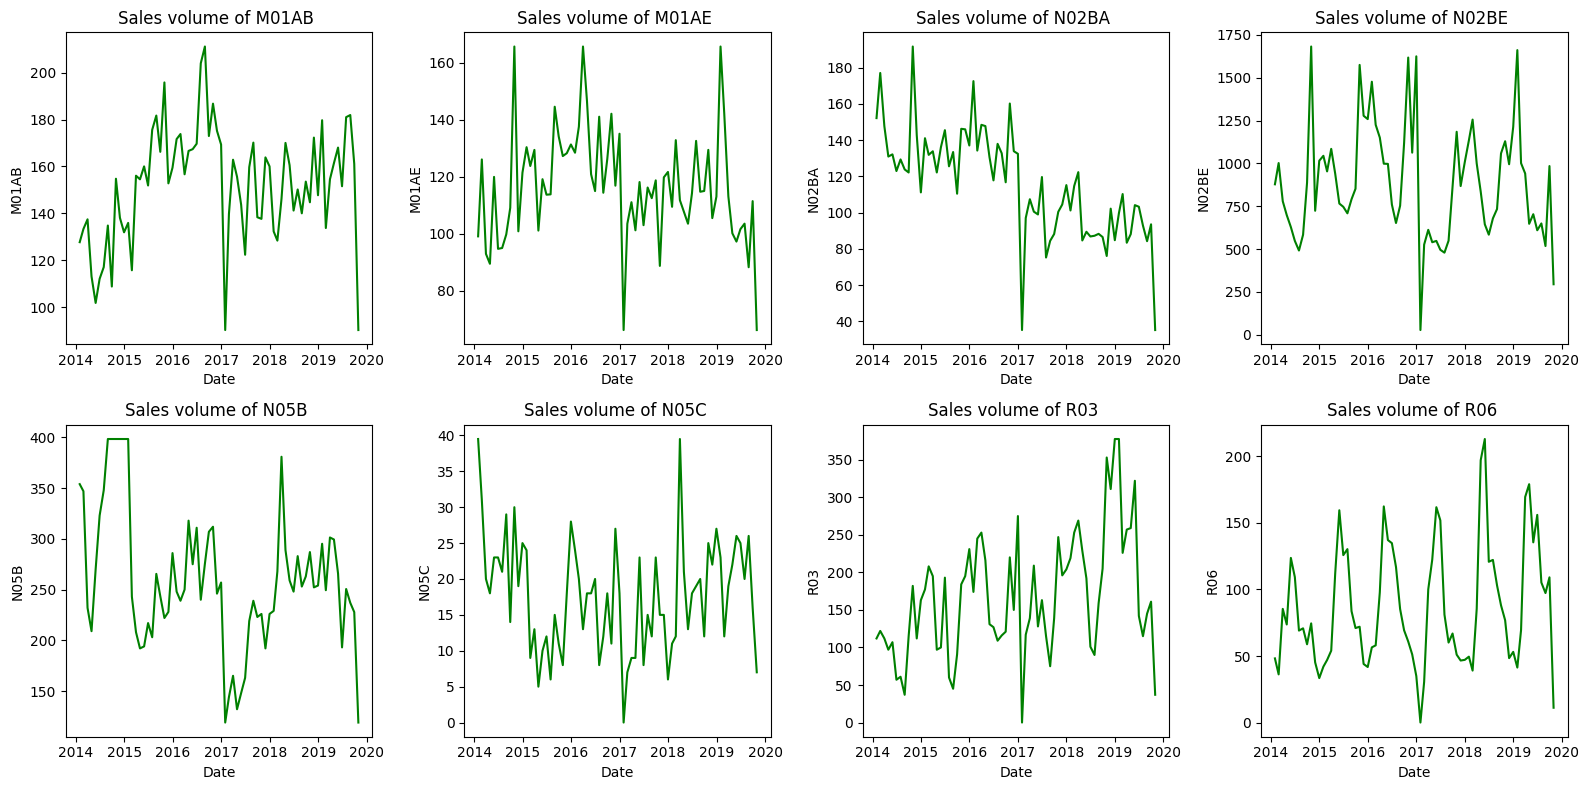

In [78]:
# Define the variables
variables = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

# Iterate through each variable and plot
for i, var in enumerate(variables):
    axes[i].plot(df['datum'], df[var], color='green')  # Plot the data
    axes[i].set_title(f"Sales volume of {var} ")  # Set title
    axes[i].set_xlabel('Date')  # Set x-axis label
    axes[i].set_ylabel(var)  # Set y-axis label

# Hide empty subplots if any
for j in range(len(variables), len(axes)):
    axes[j].axis('off')


plt.tight_layout()
plt.show()

In [68]:
def plot_yearly_sales(ax, column):
    monthly.groupby('year')[column].mean().plot.bar(ax=ax)  # calculating yearly sales using groupby
    ax.set_title(f'Yearly sales of {column}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')

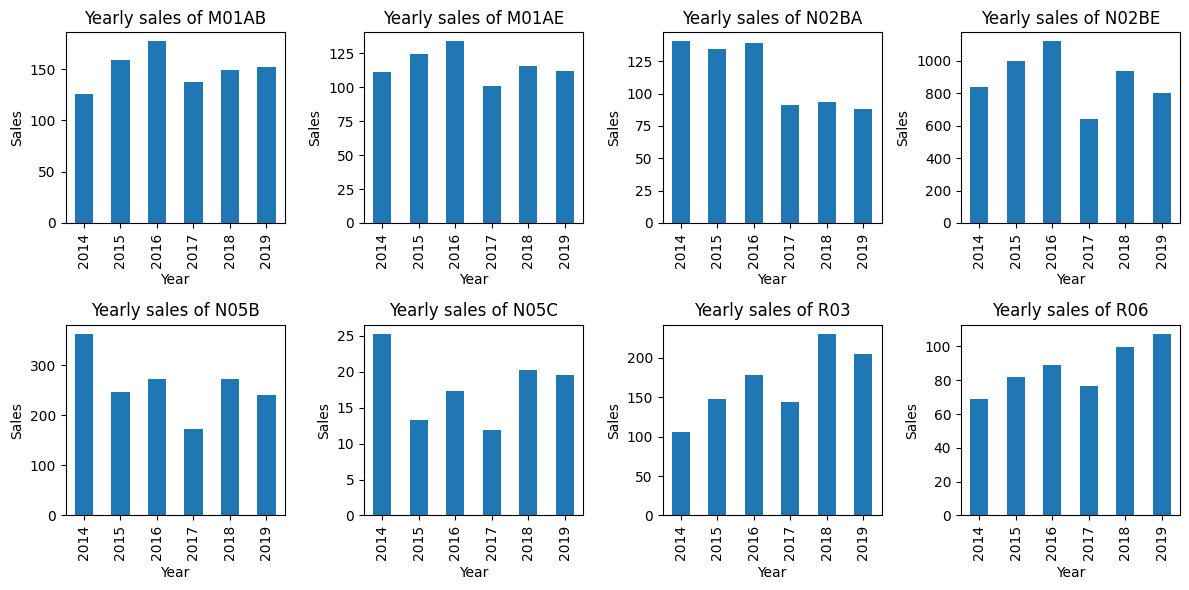

In [69]:
# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))  # 4 rows, 2 columns for 8 variables
axes = axes.flatten()

# Iterate through each variable and plot yearly sales
for i, column in enumerate(df.columns[1:9]):  # drug categories are from index 1 to 8
    plot_yearly_sales(axes[i], column)

plt.tight_layout()
plt.show()

In [70]:
df.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
count,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2016-12-14 15:05:08.571428608,149.992000,116.514286,115.020843,892.542071,262.118571,17.842857,167.675000,86.662571,2016.428571,6.357143,30.428571
min,2014-01-31 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,28.000000
25%,2015-07-07 18:00:00,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000,2015.000000,3.250000,30.000000
50%,2016-12-15 12:00:00,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000,2016.000000,6.000000,31.000000
75%,2018-05-23 06:00:00,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500,2018.000000,9.000000,31.000000
max,2019-10-31 00:00:00,211.130000,222.351000,191.600000,1856.815000,492.000000,50.000000,386.000000,213.040000,2019.000000,12.000000,31.000000
std,NaN,31.485325,27.889336,31.245899,338.843908,85.060930,8.481242,81.767979,45.859336,1.690309,3.417923,0.843929


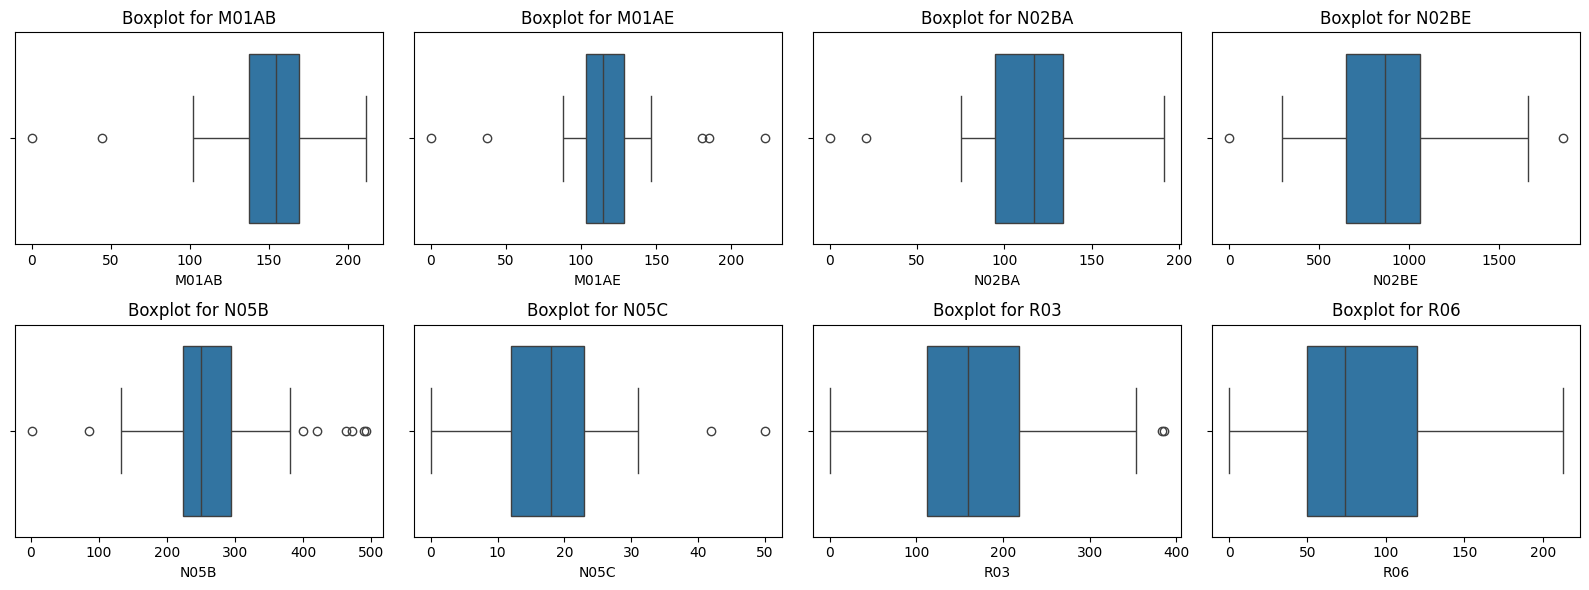

In [71]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
num_columns = df.columns[1:9]
num_plots = len(num_columns)

for i, column in enumerate(num_columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Hide empty subplots if any
for j in range(num_plots, 2 * 4):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


In [72]:
for column in num_columns:
     if column not in ['datum']:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        df[column] = df[column].where((df[column] > lower_bound), other=lower_bound)
        df[column] = df[column].where((df[column] < upper_bound), other=upper_bound)

Above code calculates the first and third quartiles (Q1 and Q3) along with the interquartile range (IQR) for each numerical column. Based on these values, lower and upper bounds are determined using the IQR method.

Any values outside these bounds are considered outliers.

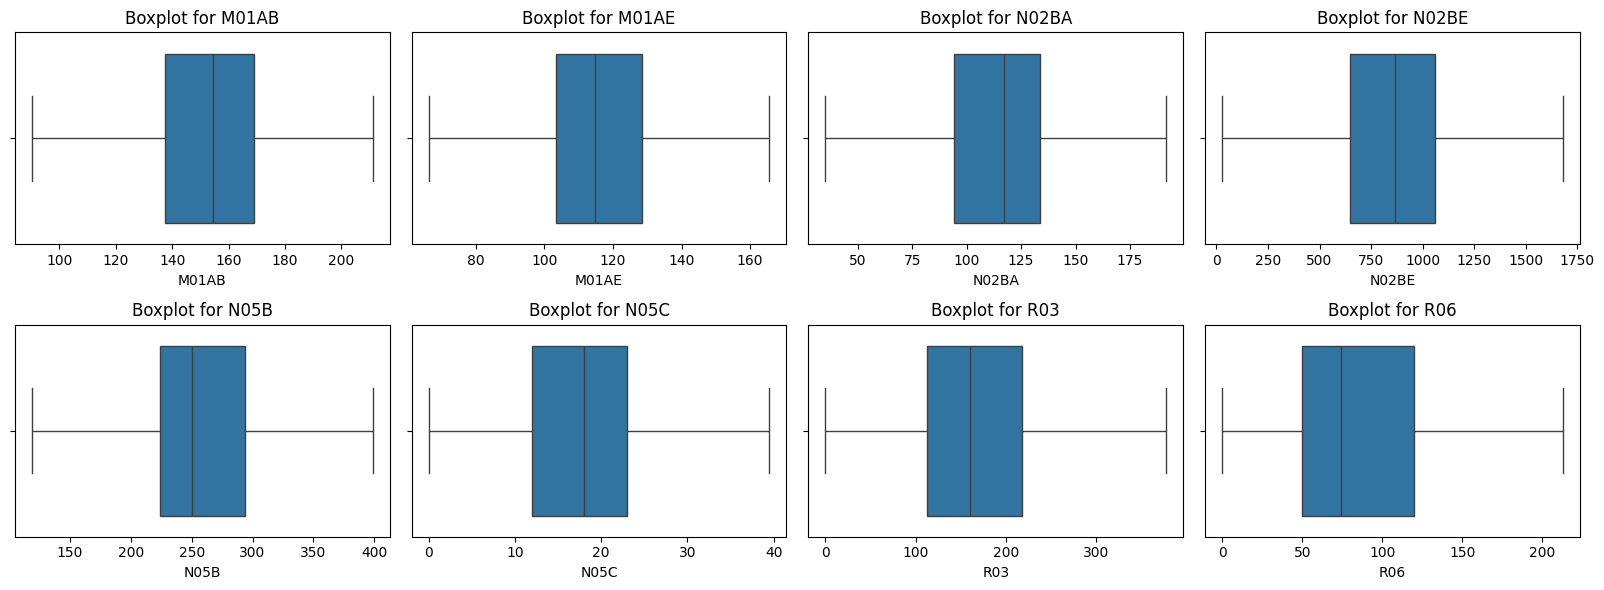

In [73]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 6))
for i, column in enumerate(num_columns):
    row = i // 4
    col = i % 4
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Hide empty subplots if any
for j in range(num_plots, 2 * 4):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

In [74]:
df.describe()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,year,month,day
count,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2016-12-14 15:05:08.571428608,151.936000,116.569957,115.731021,890.441393,259.358571,17.657143,167.464286,86.662571,2016.428571,6.357143,30.428571
min,2014-01-31 00:00:00,90.225000,66.256000,35.181250,28.098750,118.900000,0.000000,0.000000,0.000000,2014.000000,1.000000,28.000000
25%,2015-07-07 18:00:00,137.490000,103.518250,94.375000,648.187500,223.750000,12.000000,112.000000,49.875000,2015.000000,3.250000,30.000000
50%,2016-12-15 12:00:00,154.635000,114.840000,117.225000,865.824500,250.300000,18.000000,160.000000,74.100000,2016.000000,6.000000,31.000000
75%,2018-05-23 06:00:00,169.000000,128.359750,133.837500,1061.580000,293.650000,23.000000,218.250000,119.807500,2018.000000,9.000000,31.000000
max,2019-10-31 00:00:00,211.130000,165.622000,191.600000,1681.668750,398.500000,39.500000,377.625000,213.040000,2019.000000,12.000000,31.000000
std,NaN,24.562112,19.439499,28.978476,331.126077,68.072986,7.877018,81.207085,45.859336,1.690309,3.417923,0.843929


In [79]:
exp_vals = [df['M01AB'].median(),df['M01AE'].median(),df['N02BA'].median(),df['N02BE'].median()
            ,df['N05B'].median(),df['N05C'].median(),df['R03'].median(),df['R06'].median()] #expenses

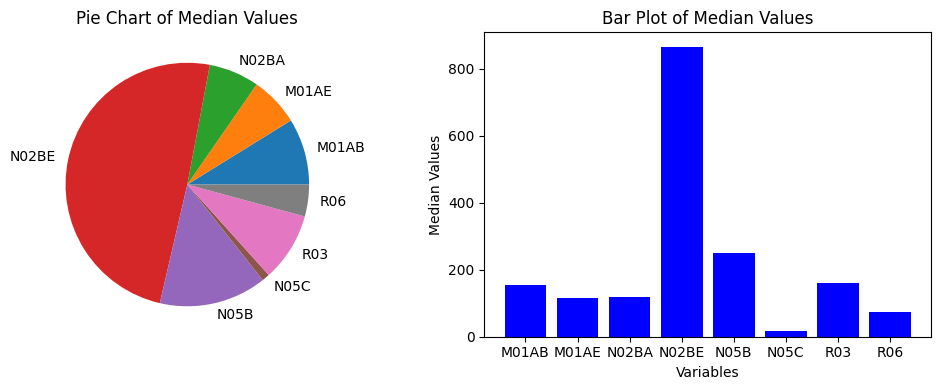

In [89]:
# subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Pie chart
axes[0].pie(exp_vals, labels=variables)
axes[0].set_title('Pie Chart of Median Values')

# Bar plot
axes[1].bar(variables, exp_vals, color='blue')
axes[1].set_xlabel('Variables')
axes[1].set_ylabel('Median Values')
axes[1].set_title('Bar Plot of Median Values')

plt.tight_layout()
plt.show()

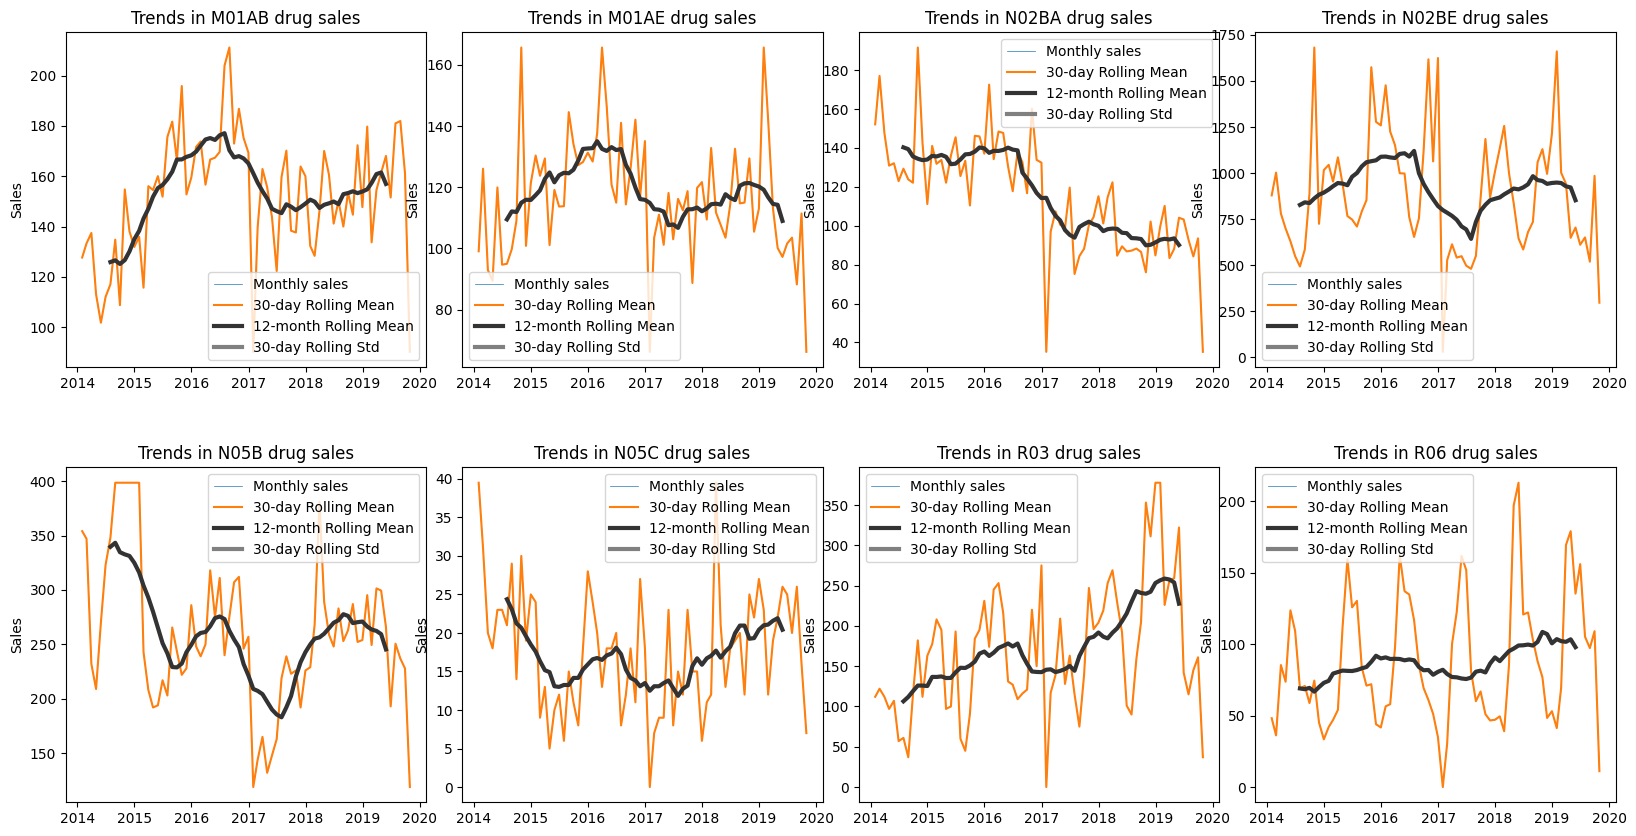

In [103]:
# Calculate rolling means and standard deviations for monthly sales data
df_monthly_365d = df.rolling(window=12, center=True).mean()  # 12 months rolling mean for yearly trend
df_monthly_30d = df.rolling(window=1, center=True).mean()  # 1 month rolling mean for monthly trend
df_monthly_std = df.rolling(window=1, center=True).std()  # 1 month rolling standard deviation

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for i, col in enumerate(variables):
    row_index = i // 4  # Calculate the row index
    col_index = i % 4  # Calculate the column index
    ax = axes[row_index, col_index]

    ax.plot(df.index, df[col], linewidth=0.5, label='Monthly sales')
    ax.plot(df_monthly_30d.index, df_monthly_30d[col], label='30-day Rolling Mean')
    ax.plot(df_monthly_365d.index, df_monthly_365d[col], color='0.2', linewidth=3, label='12-month Rolling Mean')
    ax.plot(df_monthly_std.index, df_monthly_std[col], color='0.5', linewidth=3, label='30-day Rolling Std')

    ax.set_ylabel('Sales')
    ax.legend()
    ax.set_title(f'Trends in {col} drug sales')

plt.show()


The plot visualizes trends in monthly drug sales data along with their corresponding rolling means and standard deviations.This visualization facilitates the identification of long-term trends and seasonal patterns in drug sales, as well as the detection of outliers or shifts in sales variability. The plot's layout, with multiple subplots arranged in rows and columns, enables a comprehensive comparison of sales trends across different drug categories, aiding in strategic decision-making and forecasting efforts.

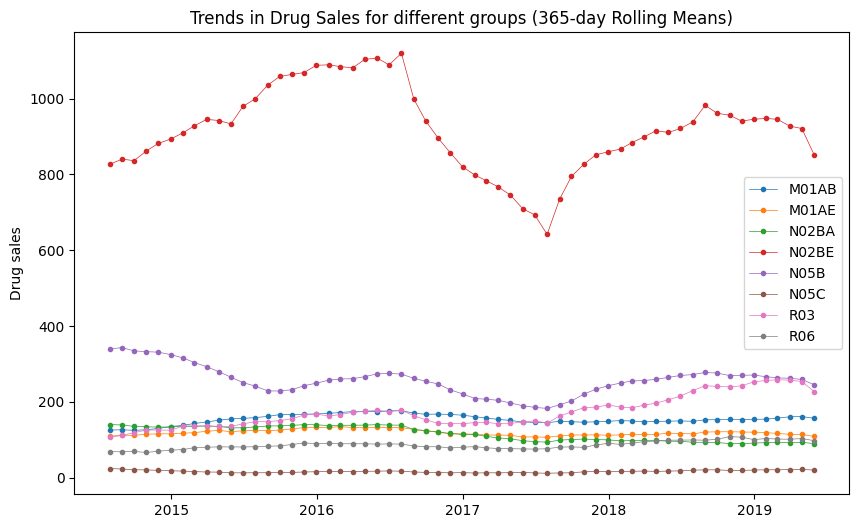

In [114]:
fig, ax = plt.subplots(figsize=(10, 6))
for nm in variables:
    ax.plot(df_monthly_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
ax.legend()
ax.set_ylabel('Drug sales')
ax.set_title('Trends in Drug Sales for different groups (365-day Rolling Means)')
plt.show()



The plot illustrates trends in drug sales for different groups using 365-day rolling means. Each drug category is represented by a line plot, showcasing the smoothed trends over a longer period.

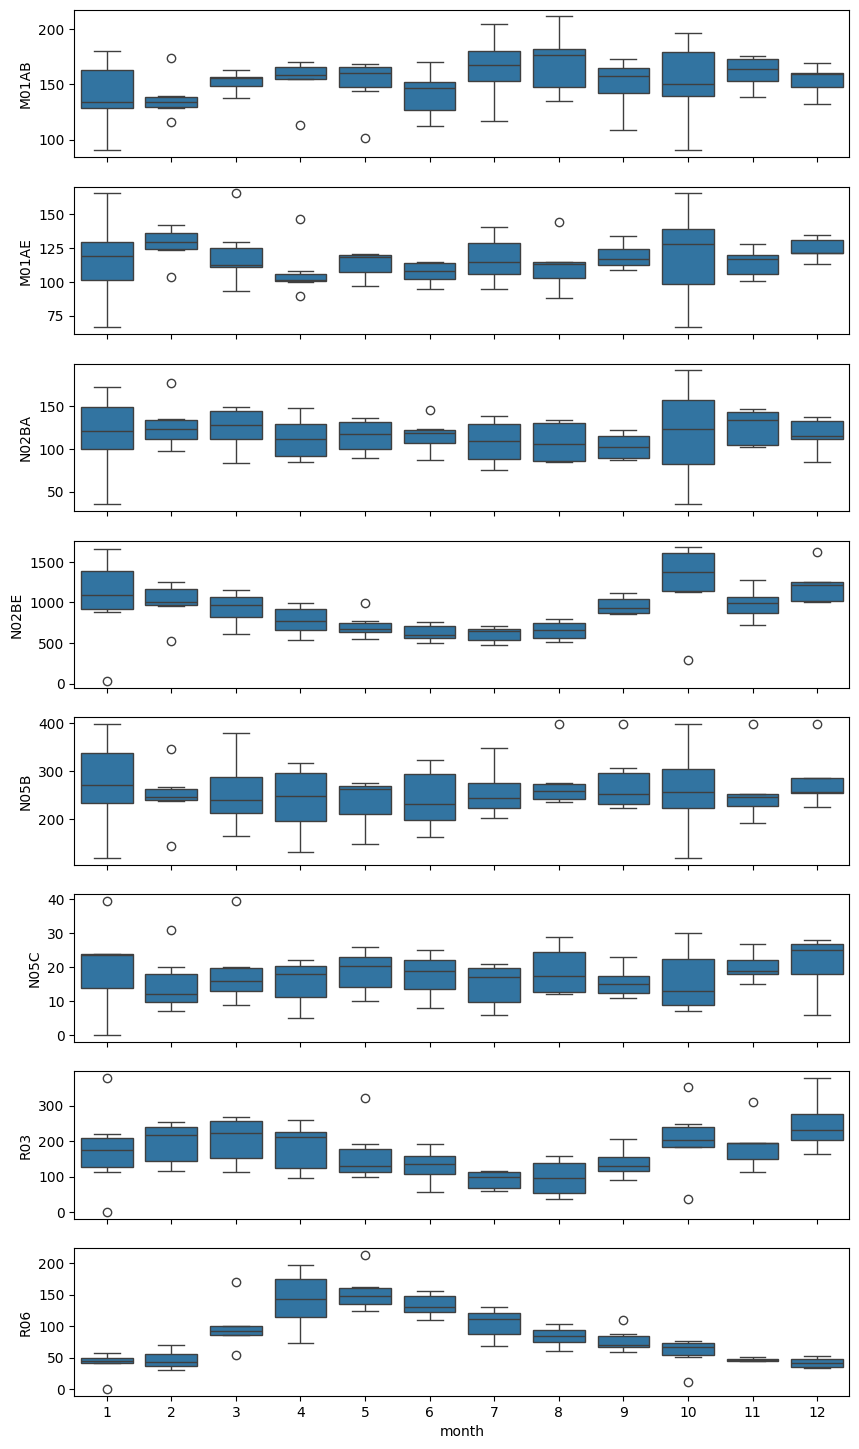

In [126]:
fig, axes = plt.subplots(8, 1, figsize=(10, 18), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df, x='month', y=name, ax=ax)

 Each boxplot represents the distribution of the variable's values for a specific month, allowing for the identification of seasonal patterns, trends, and potential outliers.

### **Forecasting for total sales of drugs**

In [131]:
df['total_sales'] = df['M01AB']
for cols in df.columns[1:9]:
    df['total_sales'] = df['total_sales']+df[cols]

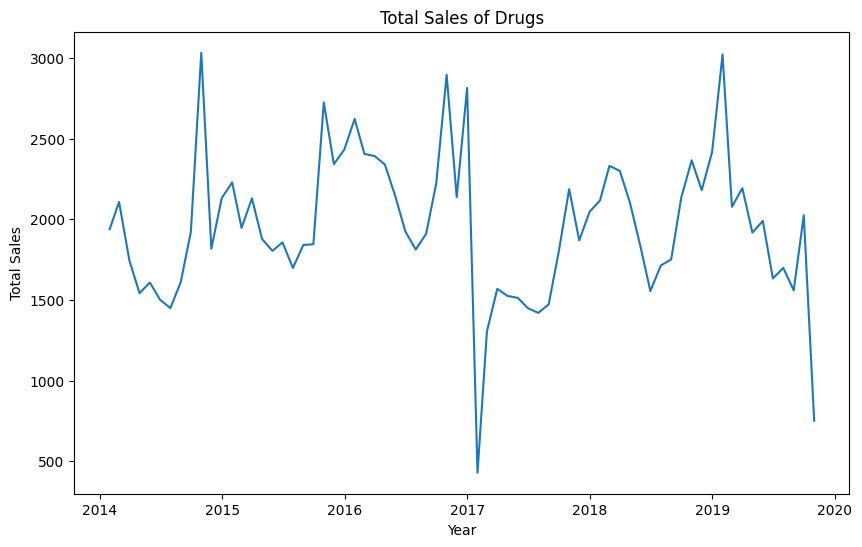

In [133]:
# plotting the total sales data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['total_sales'])
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales of Drugs')
plt.show()

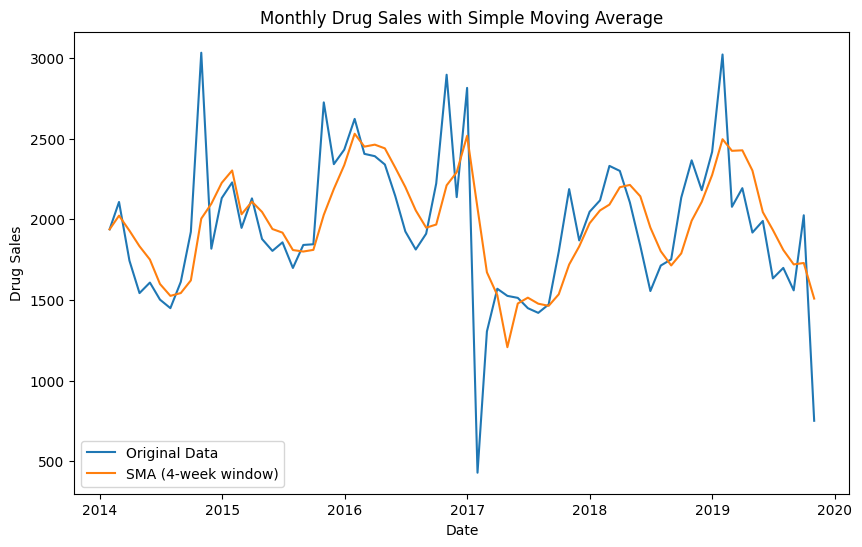

In [134]:
# Calculate a simple moving average with window size 4 (adjust as needed)
window_size = 4
monthly['SMA'] = monthly['total_sales'].rolling(window=window_size, min_periods=1).mean()

# Plot the original data and the moving average
plt.figure(figsize=(10, 6))
plt.plot(monthly.index, monthly['total_sales'], label='Original Data')
plt.plot(monthly.index, monthly['SMA'], label=f'SMA ({window_size}-week window)')
plt.title('Monthly Drug Sales with Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Drug Sales')
plt.legend()
plt.show()


In time series forecasting, plotting the original data alongside a simple moving average (SMA) helps to visualize trends and smooth out fluctuations in the data. The SMA provides a clearer representation of the underlying pattern by averaging out short-term variations, making it easier to identify long-term trends or seasonality.

In [135]:
train_end = dt.datetime(2019,7,31)
# test_end = datetime(2004,1,1) till end

train_data = monthly[:train_end]
test_data = monthly[train_end + dt.timedelta(days=1):]

An AutoRegressive (AR) model is a time series forecasting technique that predicts future values based on past observations. It assumes that the current value of a variable depends linearly on its past values, with the relationship described by a lagged autoregressive term. The model determines the optimal lag order, representing the number of past observations considered, to capture the temporal dependencies in the data. By estimating coefficients for each lagged term, the AR model generates forecasts by combining historical information with exogenous variables.

In [154]:
import statsmodels.api as sm

lag_order = 1  # Specify the number of lag observations in the model

train_data = df['total_sales']

train_data_lagged = sm.tsa.lagmat(train_data, lag_order, trim='both')  # Create lagged variables

endog = train_data[lag_order:]  # Define the endogenous (dependent) variable

exog = sm.add_constant(train_data_lagged)  # Define the exogenous (independent) variables

# Fit the AutoReg model
model = sm.tsa.AutoReg(endog, lags=lag_order, exog=exog)
results = model.fit()

# Print the summary of the model
print(results.summary())


                            AutoReg Model Results                             
Dep. Variable:            total_sales   No. Observations:                   69
Model:                   AutoReg-X(1)   Log Likelihood                -507.942
Method:               Conditional MLE   S.D. of innovations            424.451
Date:                Sat, 11 May 2024   AIC                           1025.884
Time:                        11:21:20   BIC                           1036.981
Sample:                    03-31-2014   HQIC                          1030.281
                         - 10-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            582.8470    117.940      4.942      0.000     351.689     814.005
total_sales.L1     0.2000      0.058      3.430      0.001       0.086       0.314
const            582.8470    117.940

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [180]:
# Calculate evaluation metrics
mae = np.mean(np.abs(residuals))
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 289.2797308422202
Mean Squared Error (MSE): 180158.57475255345
Root Mean Squared Error (RMSE): 424.4509097087123


In [209]:
# Get the residuals
residuals = results.resid

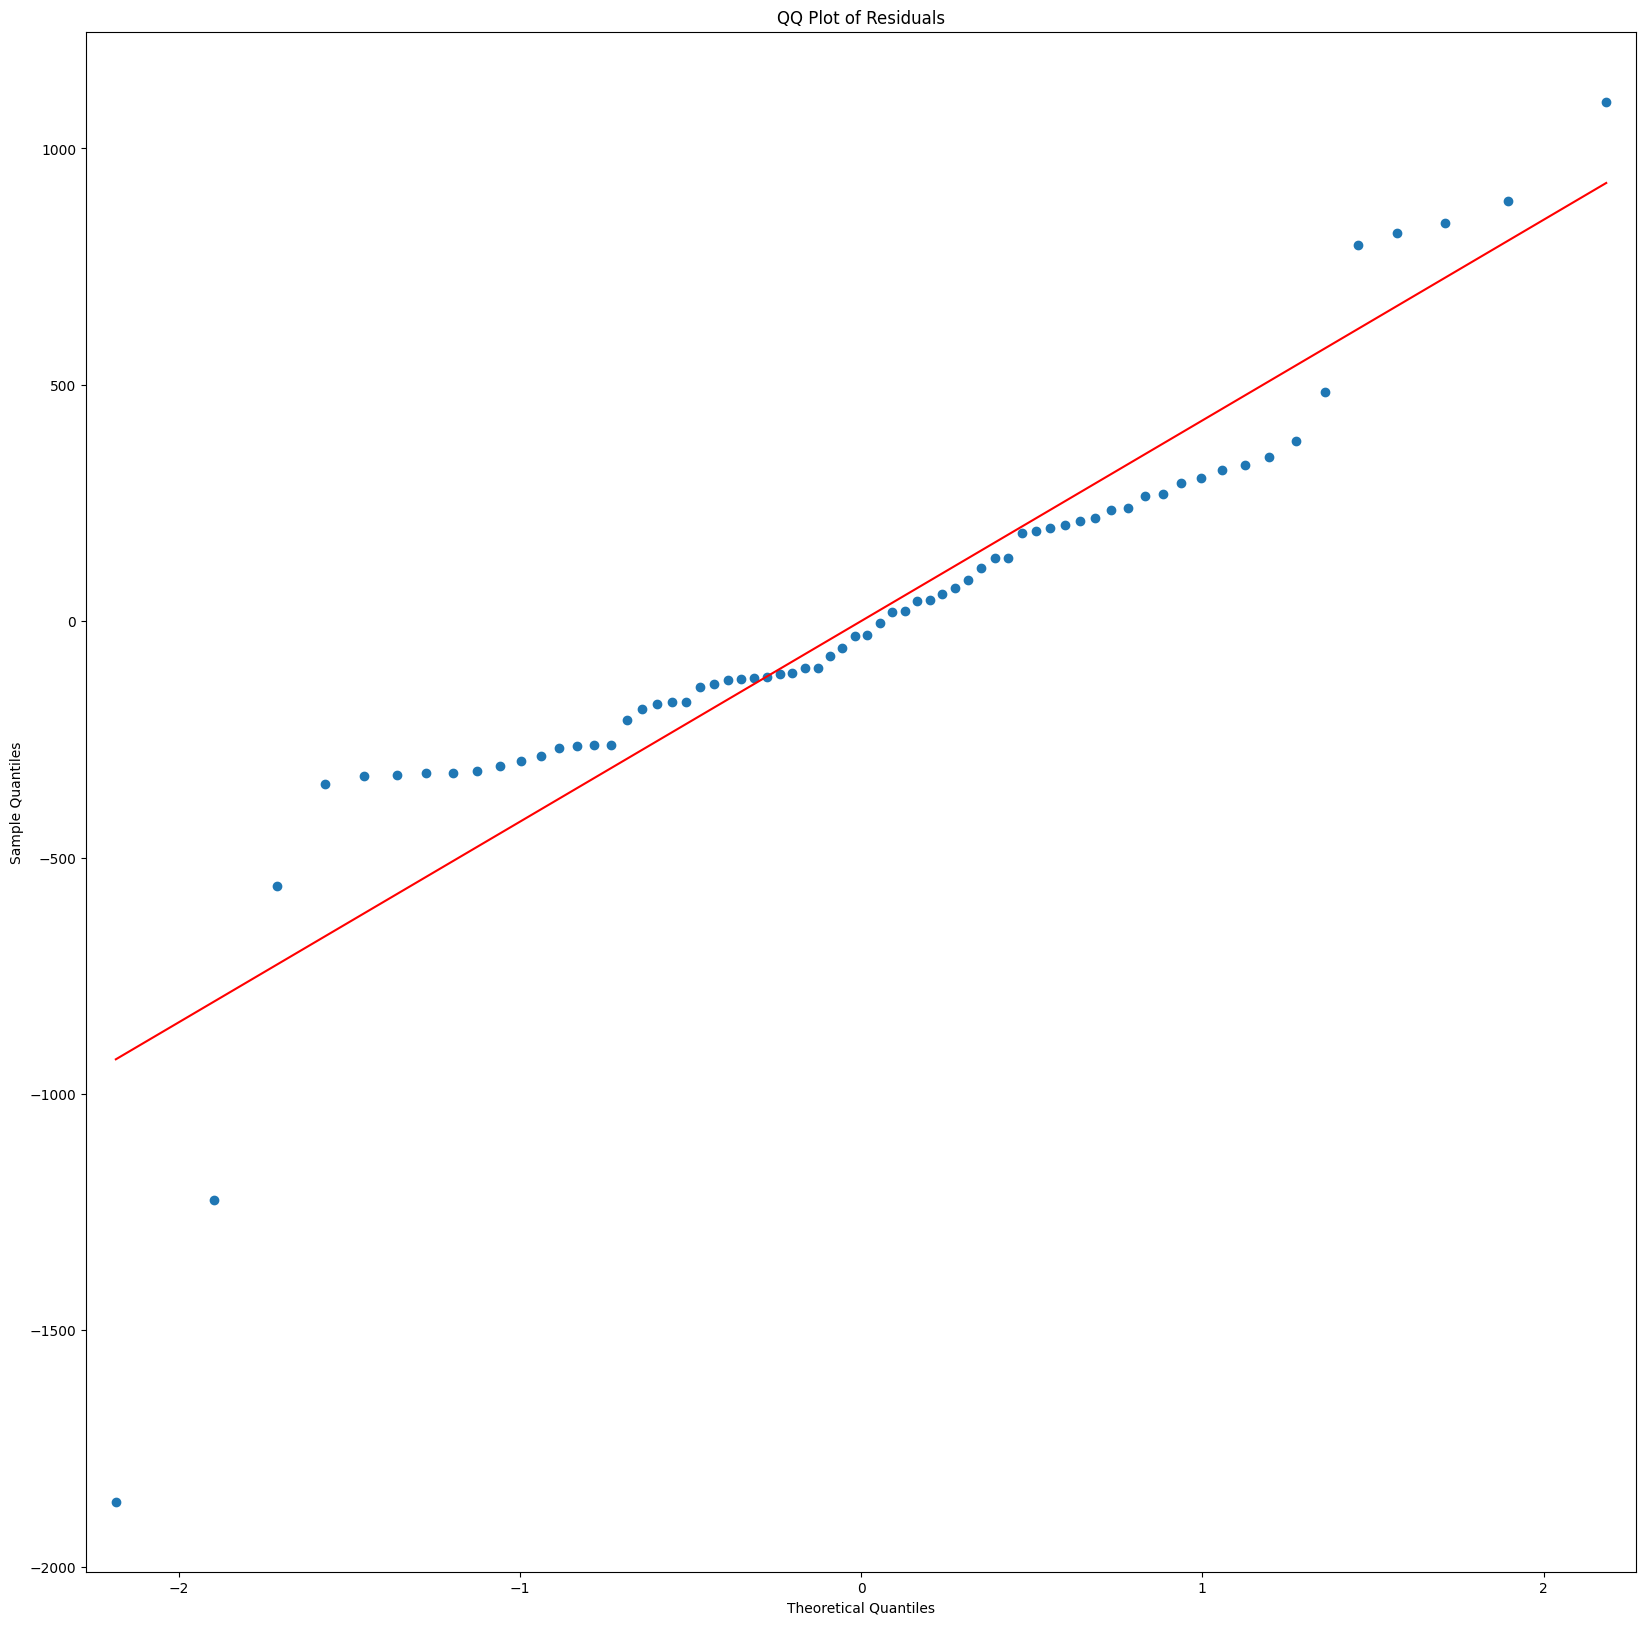

In [157]:
# QQ Plot of Residuals
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

In [198]:
# Increase the number of rows in exog_oos
exog_oos = sm.tsa.lagmat(test_data['total_sales'], lag_order, trim='both')
exog_oos = sm.add_constant(exog_oos)

# Forecast 2 steps ahead
forecast = results.forecast(steps=2, exog=exog_oos)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [200]:
forecast

2019-11-30    1627.744240
2019-12-31    1896.174586
Freq: M, dtype: float64

The forecast predicts future values of the variable, in this case, sales, based on the model's learned patterns and historical data.

2019-11-30: Predicted sales for November 2019 is approximately 1627.74.

2019-12-31: Predicted sales for December 2019 is approximately 1896.17.

Freq: M: Indicates that the forecast is monthly, meaning it predicts sales for each month.

These forecasted values provide insights into the expected trend and magnitude of sales for the specified time periods, aiding in decision-making and planning processes.

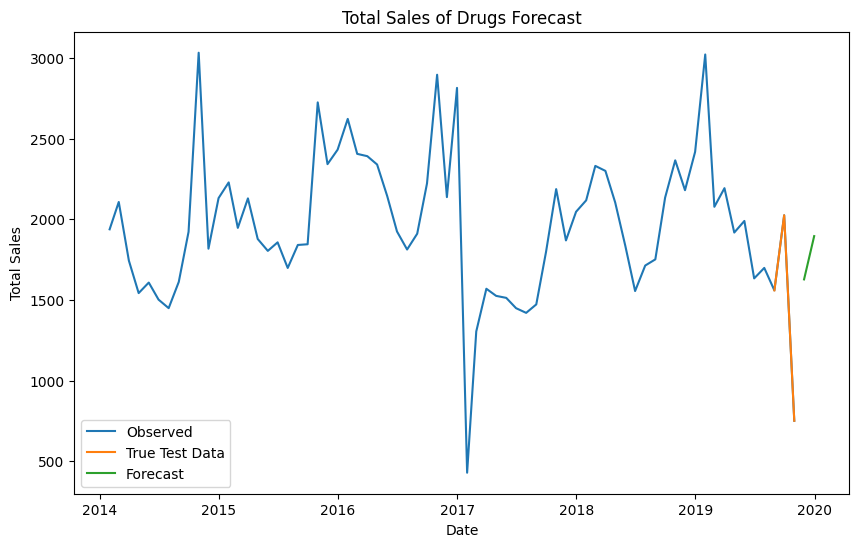

In [199]:
# Plot the forecast
plt.figure(figsize=(10, 6))
train_data_df = pd.DataFrame(train_data)
plt.plot(train_data.index,train_data_df['total_sales'], label='Observed')
plt.plot(test_data.index, test_data['total_sales'], label='True Test Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales of Drugs Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

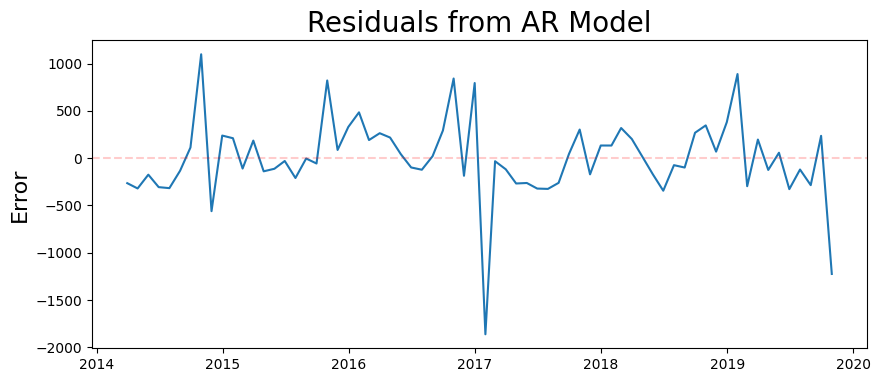

In [208]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)